In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import os
import glob
from os import walk
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec
from IPython.display import display, clear_output
from labexp import experiments

from mpl_toolkits.axes_grid1 import make_axes_locatable,ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.gridspec import GridSpec
plt.style.use('/media/labfiles/lab-codes/plotstyle.mplstyle')

In [2]:
exp3 = experiments(1,'nano','afm','grating_InP')

|  No. Dir  | Name Dir                                        |  No. files  |
|-----------|-------------------------------------------------|-------------|
|     0     | nano/grating_InP/exp_2021-11/exp_04-11_afm      |      3      |
|     1     | nano/grating_InP/exp_2021-11/exp_06-11_afm      |      2      |
|     2     | nano/grating_InP/exp_2022-01/exp_2022_13_01_afm |      3      |
|     3     | nano/grating_InP/exp_2022-01/exp_2022_14_01_afm |      1      |
|     4     | nano/grating_InP/exp_2022-01/exp_2022_19_01_afm |      2      |


In [26]:
exp1=exp3.data[2][0][:,1:].T; exp2=exp3.data[2][1][:,:].T

In [27]:
def CorrImag(datIm,grade,offset):

    ImRes=np.zeros(datIm.shape)

    for i in range(ImRes.shape[0]):
        datnum=np.array(datIm[i,:])
    
        x=np.arange(0,datnum.size)
        a,b =np.polyfit(x,datnum,grade)
        fit=a*x+b
        ImRes[i,:]=fit-datnum+offset
    return ImRes

In [28]:
ImRes=CorrImag(exp1,1,2000)
ImRes2=CorrImag(exp2,1,2000)

# First image without correction

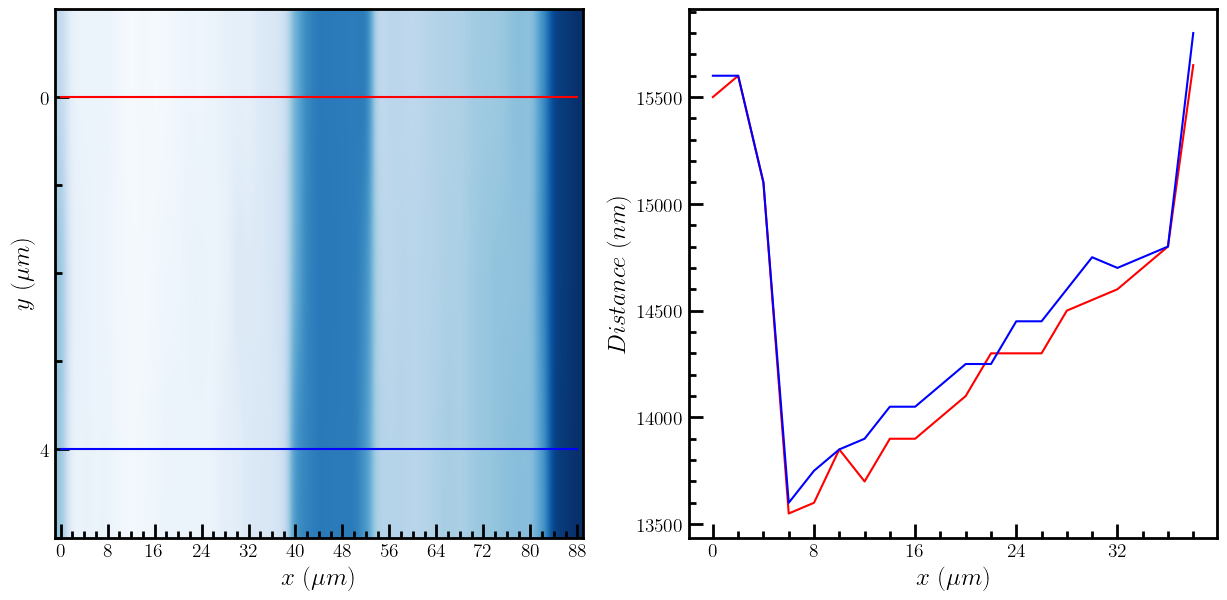

In [102]:
fig = plt.figure(figsize=(15, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[1,1])

ax1 = fig.add_subplot(gs[0, 0])
ax =fig.add_subplot(gs[0, 1])

npix1=0
npix2=2
#npix3=3

ax1.imshow(exp2[:,1:],cmap='Blues',aspect='auto',interpolation='gaussian')
ax1.plot([0,44],[npix1,npix1],'r')
ax1.plot([0,44],[npix2,npix2],'b')
#ax1.plot([0,10],[npix3,npix3],'k')
ax1.set_xlabel(" $x$ $(\mu m)$")
ax1.set_xticks(np.arange(0,45,4))
ax1.set_xticklabels(np.arange(0,90,8))
ax1.set_ylabel(" $y$ $(\mu m)$")
ax1.set_yticks(np.arange(0,4,2))
ax1.set_yticklabels(np.arange(0,8,4))

ax.set_xlabel(" $x$ $(\mu m)$")
ax.set_xticks(np.arange(0,45,4))
ax.set_xticklabels(np.arange(0,90,8))
ax.set_ylabel(" $Distance$ $(n m)$")
ax.plot(exp1[npix1,1:],'r')
ax.plot(exp1[npix2,1:],'b')

plt.show()

In [43]:
xi=0;xf=exp2.shape[1]
yi=0;yf=exp2.shape[0]
nx, ny = exp2.shape[1], exp2.shape[0]
X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))
Z1   =  exp2[yi:yf,xi:xf]

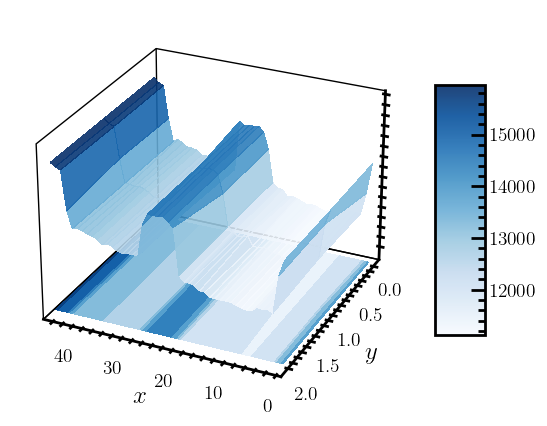

In [104]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

#fig.canvas.layout.width = '100%'
#fig.canvas.layout.height = '500px'
ax = plt.axes(projection='3d')
surf=ax.plot_surface(X, Y,Z1,cmap='Blues', shade=True,antialiased=False,alpha=0.9)
ax.grid(False)

ax.xaxis.pane.set_edgecolor('#000000')
ax.xaxis.pane.set_linewidth(1)
ax.yaxis.pane.set_edgecolor('#000000')
ax.yaxis.pane.set_linewidth(1)
ax.zaxis.pane.set_edgecolor('#000000')
ax.zaxis.pane.set_linewidth(1)

ax.xaxis.pane.set_alpha(1)
ax.yaxis.pane.set_alpha(1)
ax.zaxis.pane.set_alpha(1)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_zticklabels([])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.view_init(azim=115,elev=27)

ax.contourf(X, Y,Z1,zdir='z',offset=9000,cmap='Blues')
ax.set_xlim(0,45)
#ax.set_ylim(0,7)

ax.set_zlim(9000,17000)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
